In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import subprocess
from aiFoam import *

from matplotlib import rcParams
rcParams["figure.dpi"] = 200

In [22]:
def plot_study(study_pattern, data_file_name):
    
    study_dframe = get_study_dframe(study_pattern, data_file_name)
    
    hidden_layers = study_dframe.index.levels[0]
    # Assumes every hidden layer is combined with every activation function
    activation_function = study_dframe.index.levels[1]
    
    fig, axs = plt.subplots(len(hidden_layers), len(activation_function), figsize=[len(hidden_layers)*3,len(activation_function)*6], squeeze=False)
    # axs = axs.reshape(-1)
    
    index_rows = 0
    index_cols = 0
    
    # Iterates over every hidden layer combination saved in the csv
    for hl in hidden_layers:
        data_cell = study_dframe.loc[hl]
        
        for af in activation_function:
            data_activation = data_cell.loc[af]
            ax = axs[index_rows, index_cols]
            
            h_old = data_activation["DELTA_X"].iloc[0]
            h_new = data_activation["DELTA_X"].iloc[-1]

            ax.plot(data_activation["DELTA_X"], data_activation["L_INF_ERROR"],'b-', label='L_INF_ERROR')
            ax.plot([h_old, h_new],[data_activation["L_INF_ERROR"].iloc[0], second_order_convergent(h_old, h_new, data_activation["L_INF_ERROR"].iloc[-1])], 'b--', label='L_INF_ERROR 2nd Order Convergence')
            ax.plot(data_activation["DELTA_X"], data_activation["L_INF_REL_ERROR"], 'g-', label='L_INF_REL_ERROR')
            ax.plot([h_old, h_new],[data_activation["L_INF_REL_ERROR"].iloc[0], second_order_convergent(h_old, h_new, data_activation["L_INF_REL_ERROR"].iloc[-1])], 'g--', label='L_INF_REL_ERROR 2nd Order Convergence')
            ax.plot(data_activation["DELTA_X"], data_activation["MEAN_REL_ERROR"], 'r-', label='MEAN_REL_ERROR')
            ax.plot([h_old, h_new],[data_activation["MEAN_REL_ERROR"].iloc[0], second_order_convergent(h_old, h_new, data_activation["MEAN_REL_ERROR"].iloc[-1])], 'r--', label='MEAN_REL_ERROR 2nd Order Convergence')
            ax.set_title(''.join([af, hl]))
            ax.set_yscale('log')
            if index_rows == 0 and index_cols == 0:
                ax.legend()#prop={'size': 6})
            ax.set_ylabel("")
            ax.set_xlabel("DELTA_X")
            
            index_cols += 1
        index_cols = 0
        index_rows += 1
    fig.tight_layout()
    fig.show()


<ipython-input-22-0f34371c5429>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


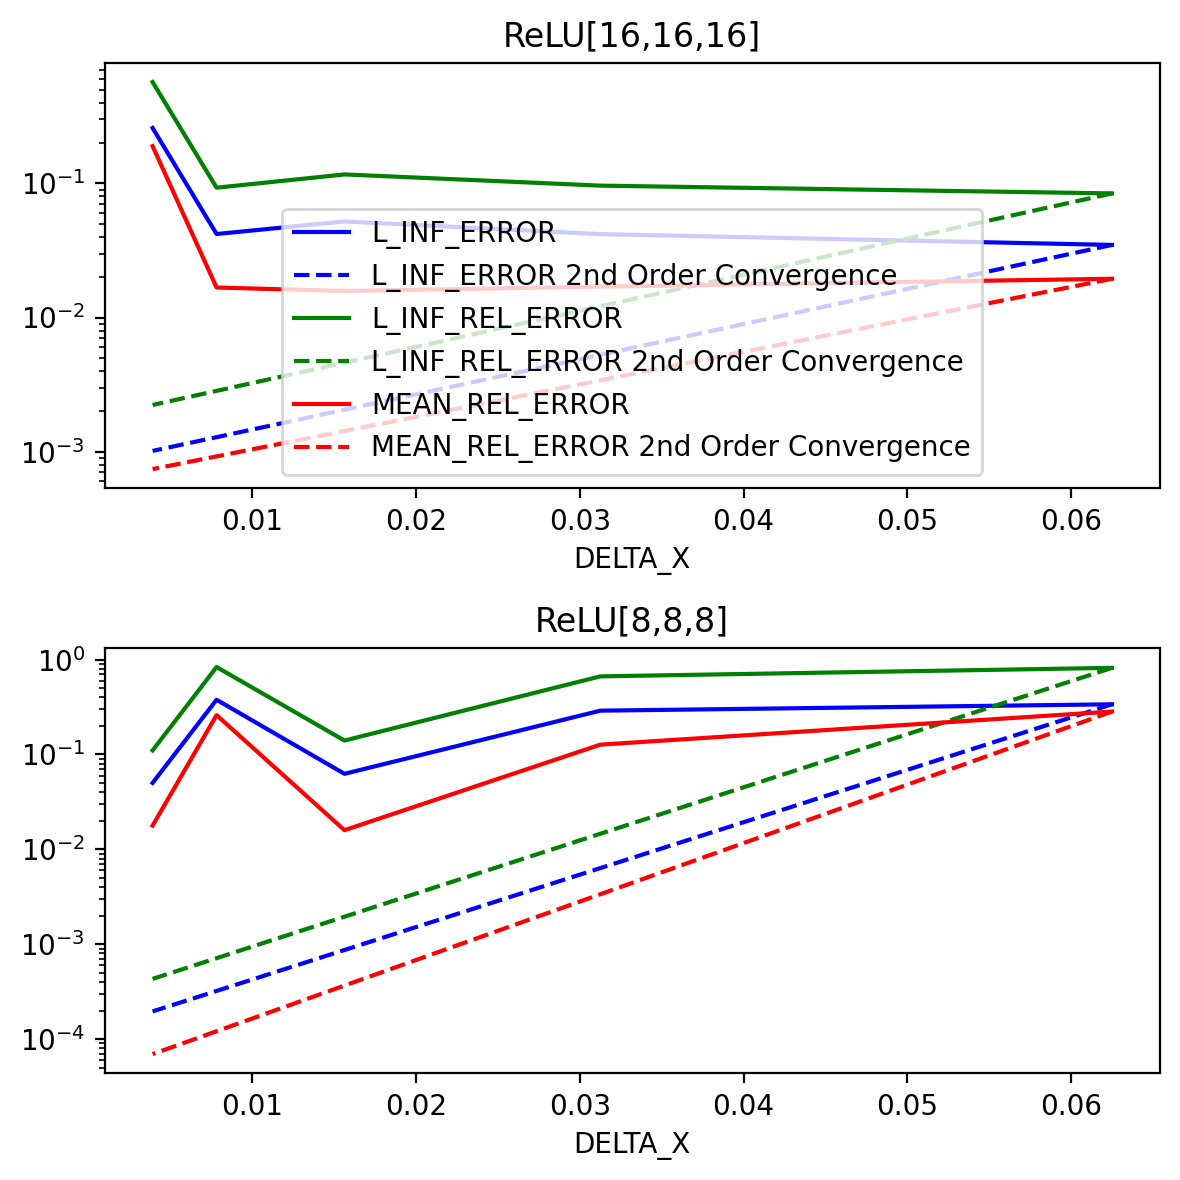

In [23]:
plot_study("convergence2D_00", "aiFoamLearn.csv")